## Testing Eval_data Correlation

Does filtering out the bad annotators + using Linear/Non-Linear models to explore metric relations better increase the Pearson Correlation between human labeling and the various metrics used for Semantic Similarity?

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from pathlib import Path

PATH_ROOT =Path(os.getcwd()).parents[0].resolve()
%cd {PATH_ROOT}

/home/shaul/workspace/GitHub/SOTA


In [15]:
import pandas as pd
import sys
import numpy as np
from src import model_corr
from src import metric_exploration
from src.testing import df_validation
import glob

In [28]:
PATH_DATA = Path(os.getcwd()).resolve() / 'data'
PATH_COMBINED = PATH_DATA / 'datasets' / 'combined_dataset.csv'
PATH_STS = PATH_DATA / 'datasets' / 'sts.csv'
PATH_QQP = PATH_DATA / 'datasets'/ 'qqp.csv'

In [175]:
metrics = ['bleu', 
           'bleu1',
           'glove_cosine',
           'fasttext_cosine',
           'BertScore',
           'chrfScore',
           'POS Dist score',
           '1-gram_overlap',
           'ROUGE-1',
           'ROUGE-2',
           'ROUGE-l',
           'L2_score',
           'WMD']

distance_metrics = ['glove_cosine',
                    'fasttext_cosine',
                    'BertScore',
                    'POS_Dist_score',
                    'L2_score',
                    'WMD']

In [66]:
with open(PATH_DATA / 'bad_annotators' / 'ba_all.txt') as f:
    bad_annotators = f.read().split("\n")

In [68]:
for file in (PATH_DATA / 'datasets').glob("*.csv"):
    print(f"\nValidating {file}.")
    df = pd.read_csv(file, index_col=0)
    if df_validation.all_tests(df):
        print(f"{file} has no issues\n")


Validating /home/shaul/workspace/GitHub/SOTA/data/datasets/sts.csv.
/home/shaul/workspace/GitHub/SOTA/data/datasets/sts.csv has no issues


Validating /home/shaul/workspace/GitHub/SOTA/data/datasets/combined_dataset.csv.
Has Null Values
Has 1 null columns in: Index(['WMD'], dtype='object')


,annotator,text1,text2,label,dataset,random,duration,total_seconds,pair_id,reduced_label,...,POS Dist score,L2_score,bleu,bleu1,chrfScore,1-gram_overlap,ROUGE-1,ROUGE-2,ROUGE-l,BertScore
29947,AO6Z9PKSYH073,i m not scared,i m not afraid,5,paraphrase_human,0,0 days 00:00:06.000000000,6,pair_9982,1,...,0.0,7.600291,8.636169e-78,0.75,0.308911,0.6,0.75,0.666667,0.75,0.995176



Validating /home/shaul/workspace/GitHub/SOTA/data/datasets/qqp.csv.
Has Null Values
Has 16 null columns in: Index(['glove_cosine', 'fasttext_cosine'], dtype='object')


,pair_id,text_1,text_2,label,dataset,WMD,glove_cosine,fasttext_cosine,POS Dist score,BertScore,L2_score,bleu,bleu1,chrfScore,1-gram_overlap,ROUGE-1,ROUGE-2,ROUGE-l
13797,13797,what is the most visited tourist attraction in...,50 60,0,qqp,7.541452,NaN,NaN,-1.0,0.809593,33.316765,0.000000e+00,0.000000,1.000000e-16,0.000000,0.000000,0.000000,0.000000
34755,34755,if 1 single 2 double 3 triple 4 quadruple what...,3 1 4 2 1 6 1 1 9 4 1 2 3 1 8,0,qqp,6.191661,NaN,NaN,-1.0,0.817427,31.163538,1.267995e-231,0.350069,2.032520e-02,0.333333,0.375000,0.000000,0.333333
87372,87372,since childhood why are we taught to use our r...,aosdhiadsoihadso dasodashdasoh,0,qqp,3.517509,NaN,NaN,-1.0,0.773004,32.513489,0.000000e+00,0.000000,6.611004e-02,0.000000,0.000000,0.000000,0.000000
182615,182615,5 3 2 151012 9 2 4 183662 8 6 3 482466 5 4 5 2...,can a year have 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 ...,0,qqp,3.247686,NaN,NaN,-1.0,0.769965,25.554724,5.027439e-155,0.387097,1.253355e-01,0.347826,0.480000,0.041667,0.258065
217458,217458,3 9 6 15 45 30 75,which is the best online platform like udemy l...,0,qqp,7.301051,NaN,NaN,-1.0,0.774589,36.497360,0.000000e+00,0.000000,1.000000e-16,0.000000,0.000000,0.000000,0.000000
222730,222730,test your iq if 5 3 28 9 1 810 8 6 214 5 4 19 ...,5 3 2 151012 9 2 4 183662 8 6 3 482466 5 4 5 2...,0,qqp,5.685385,NaN,NaN,-1.0,0.812699,26.981937,4.066632e-155,0.226716,6.056547e-02,0.228571,0.346154,0.160000,0.372093
342159,342159,5 3 2 151012 9 2 4 183662 8 6 3 482466 5 4 5 2...,brain teasers what is the significance of this...,0,qqp,4.933079,NaN,NaN,-1.0,0.805255,27.855181,7.644168e-155,0.482759,1.007523e-01,0.347826,0.583333,0.173913,0.322581
390916,390916,3c 2fscript 3e 3cscript 3ealert 1 3c 2fscript ...,what is the mechanism of fast charging in the ...,0,qqp,3.180801,NaN,NaN,-1.0,0.774977,36.690182,0.000000e+00,0.000000,5.699524e-02,0.000000,0.000000,0.000000,0.000000


### Getting the Train/Test Data

In [225]:
X_train, X_test, y_train, y_test = model_corr.get_train_test_data(train_path = PATH_COMBINED, all_metrics=metrics, scale_label = False)

Size of train_data: 23928	Size of test_data: 5983


### Running the baseline metric of the test dataset

In [226]:
X_test.corrwith(y_test).apply(lambda x: abs(x)).sort_values(ascending=False)

ROUGE-1            0.493158
BertScore          0.491796
ROUGE-l            0.489780
bleu1              0.486845
1-gram_overlap     0.475380
chrfScore          0.469386
L2_score           0.443846
ROUGE-2            0.434355
fasttext_cosine    0.401261
WMD                0.386748
glove_cosine       0.349020
bleu               0.325275
POS Dist score     0.290763
dtype: float64

### Checking the correlation after Linear Model (RF)

In [198]:
pearsonr, model = model_corr.RF_corr(X_train,X_test,y_train,y_test,10)
print("Correlation is: ", pearsonr)
feature = pd.DataFrame([model.feature_importances_], columns=X_train.columns, index = ["Importance"]).T
feature.sort_values("Importance",ascending=False)[:3]

KeyboardInterrupt: 

## Checking the correlation after the Non-linear Model (MLP)

(0.015380194767749019, 0.23425177893584928)

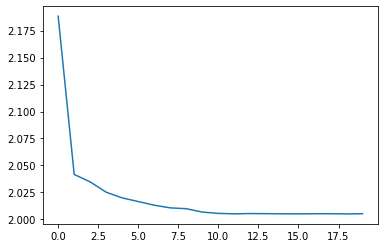

In [186]:
model_corr.MLP_corr(X_train,X_test,y_train,y_test, num_hl=64, batch_size = 32, num_epochs=20, lr=1e-3)

## NO MANDS LAND